In [1]:
import math
import numpy as np
import torch
import random

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(font_scale = 1.8)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 4
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 14
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['xtick.labelsize'] = 18
# matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['axes.xmargin'] = 0.1
matplotlib.rcParams['axes.ymargin'] = 0.1
matplotlib.rc('font', **{'weight': 'normal', 'size': 28})
# plt.style.use('dark_background')

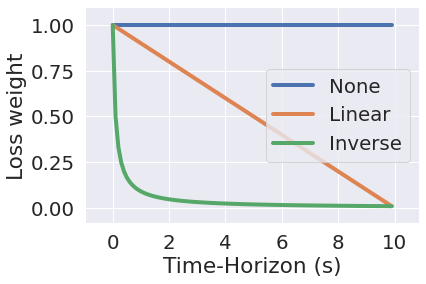

In [4]:
x = list(range(100))
plt.plot(x, [1] * len(x), label = "None")
plt.plot(x, np.arange(1.0, 0.0, -1.0 / float(len(x))), label = "Linear")
plt.plot(x, list(map(lambda i: 1.0 / float(i+1), x)), label = "Inverse")

plt_ticks = list(range(0, 101, 20))
plt.xticks(plt_ticks, list(map(lambda i: i // 10, plt_ticks)))
plt.xlabel("Time-Horizon (s)")
plt.ylabel("Loss weight")
plt.legend()

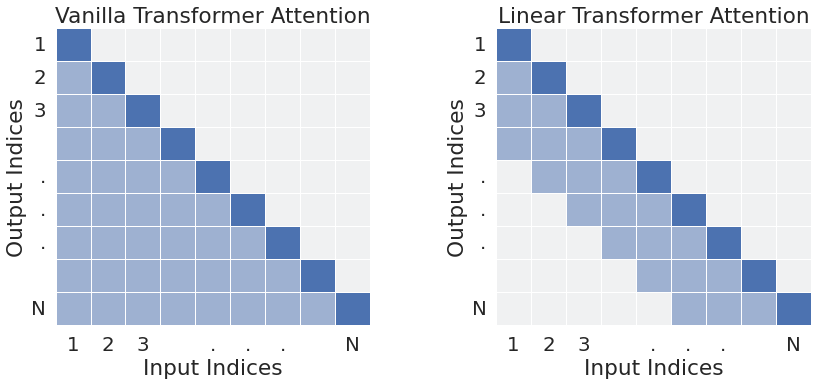

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ticks = [ '1', '2', '3', None, '.', '.', '.', None, 'N' ]

send = np.tril(np.ones([9, 9])) * 0.5
np.fill_diagonal(send, 1.0)
sns.heatmap(
    send, linewidths=1, ax = ax[0], 
    cmap = sns.color_palette("light:b", as_cmap=True),
    cbar = False,
    xticklabels=ticks
)
ax[0].set_yticklabels(ticks, rotation=0) 
ax[0].set_title("Vanilla Transformer Attention")
ax[0].set_ylabel("Output Indices")
ax[0].set_xlabel("Input Indices")

send = np.tril(np.ones([9, 9])) * 0.5
np.fill_diagonal(send, 1.0)
WINDOW = 3
for i in range(send.shape[0]): send[i, :max(0, i-WINDOW)] = 0.0
sns.heatmap(
    send, ax = ax[1],
    linewidths=1,
    cmap = sns.color_palette("light:b", as_cmap=True),
    cbar = False,
    xticklabels=ticks
)

ax[1].set_yticklabels(ticks, rotation=0) 
ax[1].set_title("Linear Transformer Attention")
ax[1].set_ylabel("Output Indices")
ax[1].set_xlabel("Input Indices")

fig.tight_layout()
plt.subplots_adjust(wspace = 0.4)

fig.show()
fig.savefig("attention.pdf")